Author: David Zhen Yin, yinzhen@stanford.edu; Lijing Wang, lijing52@stanford.edu; Jef Caers, jcaers@stanford.edu (2020)

## Load datasets

In [ ]:
## Clone data from our GitHub repository
! git clone https://github.com/sdyinzhen/GS240_resources.git 

In [ ]:
pip install geopandas

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Overview of Earthquake dataset

We plot distributions of the global earthquake dataset

### Global

In [ ]:
earthq_data = pd.read_csv('/content/GS240_resources/EVS_Earthquakes/global_database.csv')

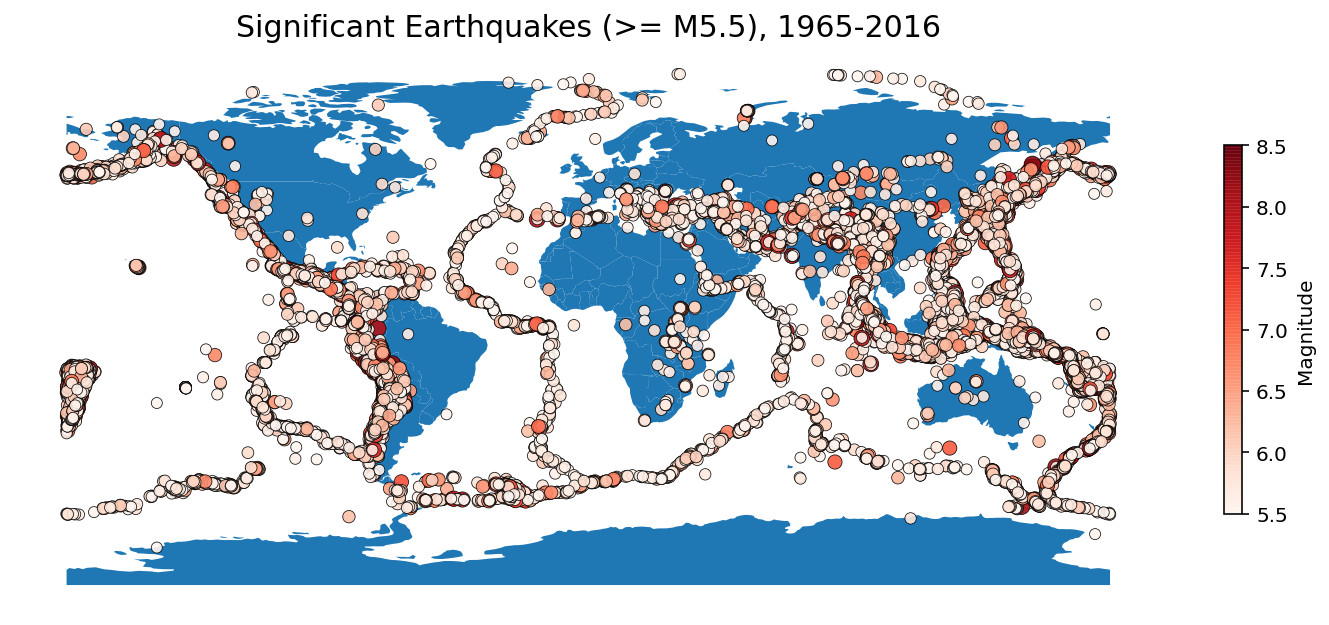

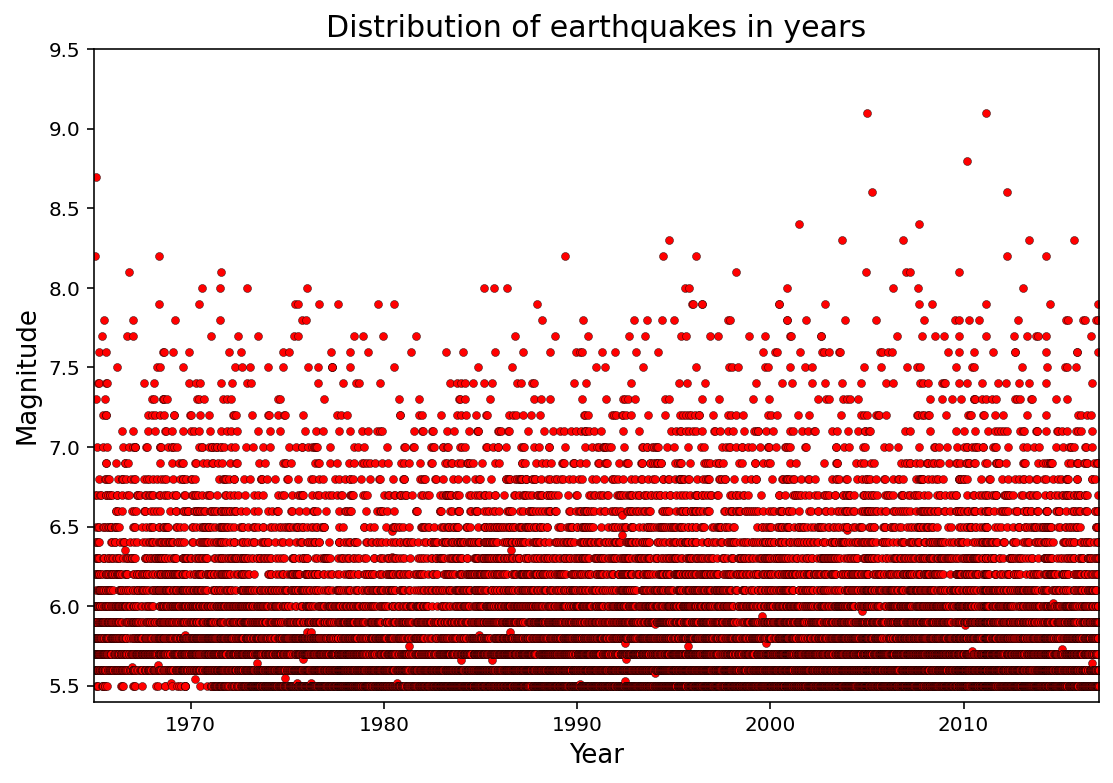

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry = [Point(xy) for xy in zip(earthq_data['Longitude'], earthq_data['Latitude'])]
gdf = GeoDataFrame(earthq_data[['Longitude', 'Latitude']], geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# gdf.plot(ax=, marker='o', color='red', markersize=15);

world.plot(figsize=(11, 6))
plt.scatter(earthq_data['Longitude'], earthq_data['Latitude'], marker='o', 
         c=earthq_data['Magnitude'],cmap='Reds', vmin = 5.5, vmax= 8.5, alpha=0.9,
         s=earthq_data['Magnitude']**2, linewidths=0.4, edgecolors='k')


plt.colorbar(label='Magnitude',fraction=0.015)

plt.title('Significant Earthquakes (>= M5.5), 1965-2016', fontsize = 15)
plt.axis('off')
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(pd.to_datetime(earthq_data['Date']), earthq_data['Magnitude'], s=16, c='r', edgecolors='k', linewidths=0.2)
plt.title('Distribution of earthquakes in years', fontsize=15)
plt.ylabel('Magnitude', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylim(5.4,9.5)
plt.xlim([datetime.date(1965, 1, 2), datetime.date(2016, 12, 30)])
plt.show()


### North America

In [7]:
nor_am_earthq = pd.read_csv('/content/GS240_resources/EVS_Earthquakes/north_america_earthquakes.csv')

Total 2152 earthquake events >= M5.5 


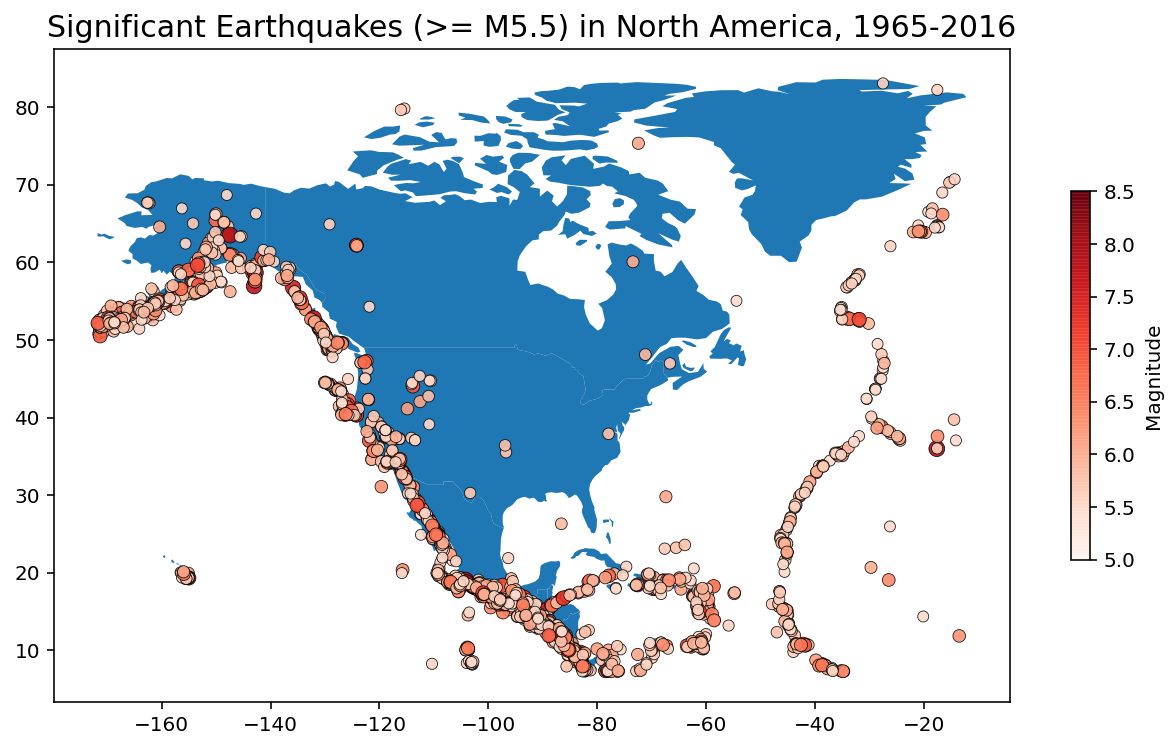

In [8]:
print('Total {} earthquake events >= M5.5 '.format(len(nor_am_earthq['Longitude'])))
world[world.continent == 'North America'].plot(figsize=(11, 6))
plt.scatter(nor_am_earthq['Longitude'], nor_am_earthq['Latitude'], marker='o', 
         c=nor_am_earthq['Magnitude'],cmap='Reds', vmin = 5, vmax= 8.5, alpha=0.9,
         s=nor_am_earthq['Magnitude']**2, linewidths=0.4, edgecolors='k')
plt.colorbar(label='Magnitude',fraction=0.015)
plt.title('Significant Earthquakes (>= M5.5) in North America, 1965-2016', fontsize = 15)
plt.show()


### Asia

In [9]:
asia_earthq = pd.read_csv('/content/GS240_resources/EVS_Earthquakes/asia_earthquakes.csv')

Total 8039 earthquake events >= M5.5 


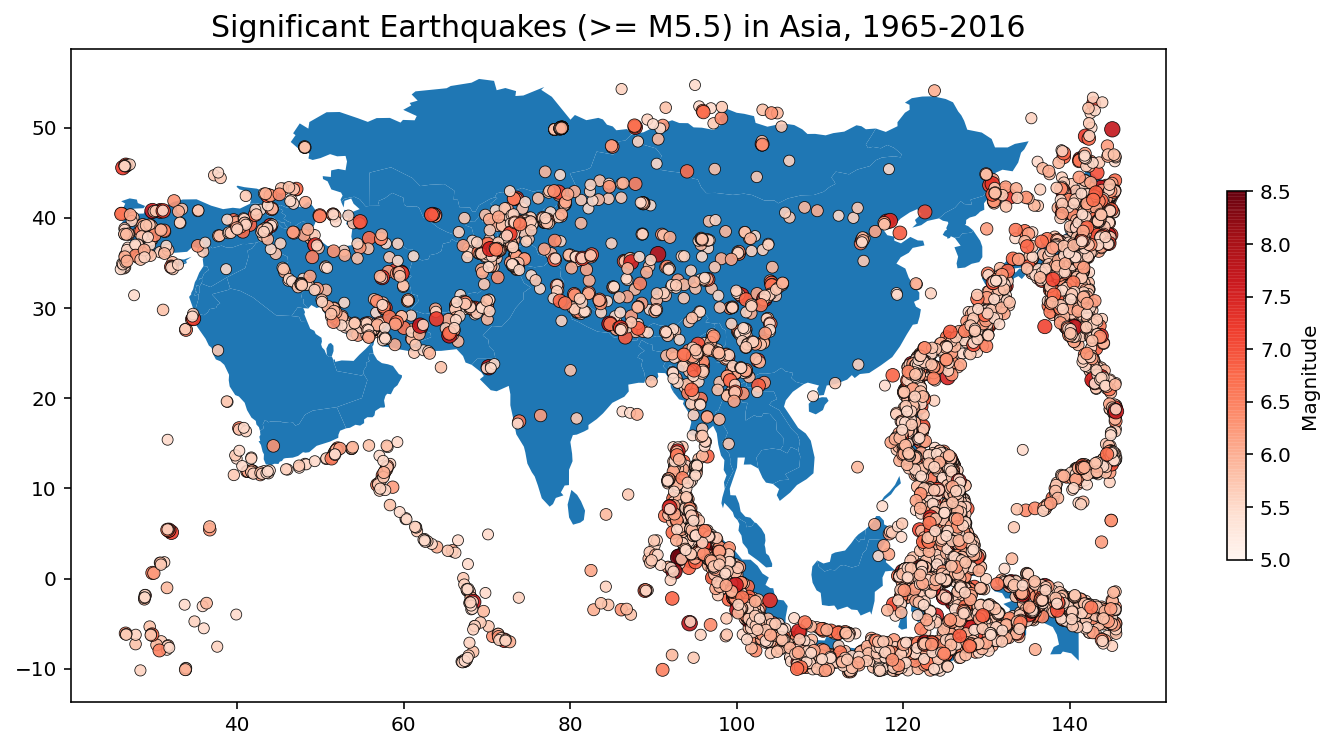

In [10]:
print('Total {} earthquake events >= M5.5 '.format(len(asia_earthq['Longitude'])))
world[world.continent == 'Asia'].plot(figsize=(11, 6))
plt.scatter(asia_earthq['Longitude'], asia_earthq['Latitude'], marker='o', 
         c=asia_earthq['Magnitude'],cmap='Reds', vmin = 5, vmax= 8.5, alpha=0.9,
         s=asia_earthq['Magnitude']**2, linewidths=0.4, edgecolors='k')
plt.colorbar(label='Magnitude',fraction=0.015)
plt.title('Significant Earthquakes (>= M5.5) in Asia, 1965-2016', fontsize = 15)
plt.show()
